## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215


0:	learn: 0.9832449	total: 64.7ms	remaining: 1m 4s
1:	learn: 0.9640516	total: 65.6ms	remaining: 32.8s
2:	learn: 0.9439194	total: 66.4ms	remaining: 22.1s
3:	learn: 0.9281323	total: 67.2ms	remaining: 16.7s
4:	learn: 0.9100644	total: 67.9ms	remaining: 13.5s
5:	learn: 0.8933693	total: 68.7ms	remaining: 11.4s
6:	learn: 0.8797968	total: 69.5ms	remaining: 9.86s
7:	learn: 0.8637831	total: 71.8ms	remaining: 8.9s
8:	learn: 0.8491281	total: 72.6ms	remaining: 7.99s
9:	learn: 0.8332646	total: 73.7ms	remaining: 7.29s
10:	learn: 0.8171533	total: 74.5ms	remaining: 6.69s
11:	learn: 0.8028731	total: 75.1ms	remaining: 6.18s
12:	learn: 0.7875362	total: 75.8ms	remaining: 5.75s
13:	learn: 0.7726839	total: 76.5ms	remaining: 5.39s
14:	learn: 0.7618944	total: 77.2ms	remaining: 5.07s
15:	learn: 0.7480816	total: 79.6ms	remaining: 4.89s
16:	learn: 0.7368006	total: 80.4ms	remaining: 4.65s
17:	learn: 0.7239702	total: 81.1ms	remaining: 4.42s
18:	learn: 0.7118045	total: 83ms	remaining: 4.29s
19:	learn: 0.7000085	tota

94:	learn: 0.3316250	total: 206ms	remaining: 1.96s
95:	learn: 0.3300275	total: 207ms	remaining: 1.95s
96:	learn: 0.3285871	total: 209ms	remaining: 1.94s
97:	learn: 0.3270812	total: 210ms	remaining: 1.94s
98:	learn: 0.3256596	total: 212ms	remaining: 1.93s
99:	learn: 0.3237791	total: 214ms	remaining: 1.92s
100:	learn: 0.3226413	total: 215ms	remaining: 1.91s
101:	learn: 0.3208821	total: 216ms	remaining: 1.9s
102:	learn: 0.3195850	total: 217ms	remaining: 1.89s
103:	learn: 0.3177382	total: 218ms	remaining: 1.88s
104:	learn: 0.3165426	total: 219ms	remaining: 1.86s
105:	learn: 0.3149219	total: 219ms	remaining: 1.85s
106:	learn: 0.3130328	total: 220ms	remaining: 1.84s
107:	learn: 0.3111463	total: 221ms	remaining: 1.83s
108:	learn: 0.3093718	total: 222ms	remaining: 1.81s
109:	learn: 0.3084274	total: 223ms	remaining: 1.8s
110:	learn: 0.3065863	total: 224ms	remaining: 1.79s
111:	learn: 0.3049503	total: 224ms	remaining: 1.78s
112:	learn: 0.3033653	total: 225ms	remaining: 1.77s
113:	learn: 0.301968

136:	learn: 0.2750436	total: 266ms	remaining: 1.68s
137:	learn: 0.2740648	total: 267ms	remaining: 1.67s
138:	learn: 0.2730828	total: 268ms	remaining: 1.66s
139:	learn: 0.2724239	total: 269ms	remaining: 1.65s
140:	learn: 0.2714790	total: 270ms	remaining: 1.64s
141:	learn: 0.2704811	total: 271ms	remaining: 1.64s
142:	learn: 0.2692325	total: 272ms	remaining: 1.63s
143:	learn: 0.2681375	total: 273ms	remaining: 1.63s
144:	learn: 0.2670110	total: 275ms	remaining: 1.62s
145:	learn: 0.2659900	total: 276ms	remaining: 1.61s
146:	learn: 0.2651805	total: 277ms	remaining: 1.6s
147:	learn: 0.2641589	total: 277ms	remaining: 1.6s
148:	learn: 0.2627183	total: 278ms	remaining: 1.59s
149:	learn: 0.2620371	total: 279ms	remaining: 1.58s
150:	learn: 0.2607190	total: 280ms	remaining: 1.57s
151:	learn: 0.2597936	total: 281ms	remaining: 1.56s
152:	learn: 0.2590399	total: 281ms	remaining: 1.56s
153:	learn: 0.2580961	total: 282ms	remaining: 1.55s
154:	learn: 0.2574531	total: 283ms	remaining: 1.54s
155:	learn: 0.

248:	learn: 0.2028383	total: 404ms	remaining: 1.22s
249:	learn: 0.2023973	total: 405ms	remaining: 1.21s
250:	learn: 0.2021895	total: 406ms	remaining: 1.21s
251:	learn: 0.2015696	total: 407ms	remaining: 1.21s
252:	learn: 0.2010294	total: 408ms	remaining: 1.2s
253:	learn: 0.2004475	total: 408ms	remaining: 1.2s
254:	learn: 0.2002311	total: 409ms	remaining: 1.2s
255:	learn: 0.1997467	total: 410ms	remaining: 1.19s
256:	learn: 0.1994114	total: 411ms	remaining: 1.19s
257:	learn: 0.1991332	total: 412ms	remaining: 1.18s
258:	learn: 0.1989143	total: 413ms	remaining: 1.18s
259:	learn: 0.1986970	total: 423ms	remaining: 1.21s
260:	learn: 0.1980854	total: 424ms	remaining: 1.2s
261:	learn: 0.1979249	total: 425ms	remaining: 1.2s
262:	learn: 0.1973722	total: 426ms	remaining: 1.19s
263:	learn: 0.1968696	total: 427ms	remaining: 1.19s
264:	learn: 0.1964139	total: 428ms	remaining: 1.19s
265:	learn: 0.1959433	total: 429ms	remaining: 1.18s
266:	learn: 0.1952820	total: 429ms	remaining: 1.18s
267:	learn: 0.194

283:	learn: 0.1885429	total: 465ms	remaining: 1.17s
284:	learn: 0.1879234	total: 477ms	remaining: 1.2s
285:	learn: 0.1872618	total: 478ms	remaining: 1.19s
286:	learn: 0.1871201	total: 480ms	remaining: 1.19s
287:	learn: 0.1869896	total: 481ms	remaining: 1.19s
288:	learn: 0.1866195	total: 483ms	remaining: 1.19s
289:	learn: 0.1861647	total: 484ms	remaining: 1.19s
290:	learn: 0.1854949	total: 486ms	remaining: 1.18s
291:	learn: 0.1849740	total: 487ms	remaining: 1.18s
292:	learn: 0.1844342	total: 488ms	remaining: 1.18s
293:	learn: 0.1840751	total: 490ms	remaining: 1.18s
294:	learn: 0.1837132	total: 491ms	remaining: 1.17s
295:	learn: 0.1830723	total: 492ms	remaining: 1.17s
296:	learn: 0.1826844	total: 494ms	remaining: 1.17s
297:	learn: 0.1821228	total: 495ms	remaining: 1.17s
298:	learn: 0.1816893	total: 496ms	remaining: 1.16s
299:	learn: 0.1812386	total: 497ms	remaining: 1.16s
300:	learn: 0.1810646	total: 499ms	remaining: 1.16s
301:	learn: 0.1806839	total: 500ms	remaining: 1.16s
302:	learn: 0

387:	learn: 0.1522464	total: 598ms	remaining: 943ms
388:	learn: 0.1520718	total: 599ms	remaining: 941ms
389:	learn: 0.1517052	total: 601ms	remaining: 940ms
390:	learn: 0.1516304	total: 602ms	remaining: 938ms
391:	learn: 0.1512263	total: 603ms	remaining: 935ms
392:	learn: 0.1510242	total: 604ms	remaining: 933ms
393:	learn: 0.1509834	total: 605ms	remaining: 930ms
394:	learn: 0.1509141	total: 606ms	remaining: 928ms
395:	learn: 0.1508263	total: 607ms	remaining: 926ms
396:	learn: 0.1505359	total: 608ms	remaining: 923ms
397:	learn: 0.1501611	total: 609ms	remaining: 921ms
398:	learn: 0.1497129	total: 610ms	remaining: 919ms
399:	learn: 0.1492958	total: 611ms	remaining: 916ms
400:	learn: 0.1492524	total: 612ms	remaining: 914ms
401:	learn: 0.1490039	total: 613ms	remaining: 912ms
402:	learn: 0.1488811	total: 614ms	remaining: 910ms
403:	learn: 0.1486269	total: 615ms	remaining: 908ms
404:	learn: 0.1484162	total: 616ms	remaining: 905ms
405:	learn: 0.1482575	total: 617ms	remaining: 903ms
406:	learn: 

437:	learn: 0.1409914	total: 659ms	remaining: 846ms
438:	learn: 0.1408557	total: 660ms	remaining: 844ms
439:	learn: 0.1406056	total: 661ms	remaining: 841ms
440:	learn: 0.1405474	total: 662ms	remaining: 839ms
441:	learn: 0.1404051	total: 663ms	remaining: 837ms
442:	learn: 0.1399475	total: 665ms	remaining: 836ms
443:	learn: 0.1397548	total: 666ms	remaining: 834ms
444:	learn: 0.1395026	total: 667ms	remaining: 832ms
445:	learn: 0.1392027	total: 668ms	remaining: 830ms
446:	learn: 0.1391042	total: 669ms	remaining: 828ms
447:	learn: 0.1390658	total: 670ms	remaining: 826ms
448:	learn: 0.1388965	total: 672ms	remaining: 824ms
449:	learn: 0.1388250	total: 673ms	remaining: 822ms
450:	learn: 0.1384485	total: 673ms	remaining: 820ms
451:	learn: 0.1381027	total: 675ms	remaining: 818ms
452:	learn: 0.1380343	total: 676ms	remaining: 817ms
453:	learn: 0.1379650	total: 677ms	remaining: 815ms
454:	learn: 0.1377544	total: 679ms	remaining: 813ms
455:	learn: 0.1376124	total: 680ms	remaining: 811ms
456:	learn: 

533:	learn: 0.1209542	total: 789ms	remaining: 689ms
534:	learn: 0.1207624	total: 791ms	remaining: 688ms
535:	learn: 0.1205460	total: 792ms	remaining: 686ms
536:	learn: 0.1204027	total: 794ms	remaining: 684ms
537:	learn: 0.1202522	total: 794ms	remaining: 682ms
538:	learn: 0.1200083	total: 796ms	remaining: 681ms
539:	learn: 0.1199726	total: 796ms	remaining: 678ms
540:	learn: 0.1195728	total: 798ms	remaining: 677ms
541:	learn: 0.1192926	total: 799ms	remaining: 675ms
542:	learn: 0.1191304	total: 799ms	remaining: 673ms
543:	learn: 0.1188527	total: 800ms	remaining: 671ms
544:	learn: 0.1185634	total: 802ms	remaining: 669ms
545:	learn: 0.1185191	total: 803ms	remaining: 668ms
546:	learn: 0.1184643	total: 804ms	remaining: 666ms
547:	learn: 0.1182239	total: 805ms	remaining: 664ms
548:	learn: 0.1181122	total: 806ms	remaining: 662ms
549:	learn: 0.1180644	total: 808ms	remaining: 661ms
550:	learn: 0.1180463	total: 809ms	remaining: 659ms
551:	learn: 0.1179999	total: 810ms	remaining: 657ms
552:	learn: 

593:	learn: 0.1113148	total: 851ms	remaining: 581ms
594:	learn: 0.1110300	total: 852ms	remaining: 580ms
595:	learn: 0.1108330	total: 853ms	remaining: 578ms
596:	learn: 0.1106536	total: 854ms	remaining: 576ms
597:	learn: 0.1103588	total: 854ms	remaining: 574ms
598:	learn: 0.1100095	total: 855ms	remaining: 573ms
599:	learn: 0.1098977	total: 856ms	remaining: 571ms
600:	learn: 0.1097955	total: 857ms	remaining: 569ms
601:	learn: 0.1095482	total: 858ms	remaining: 567ms
602:	learn: 0.1092876	total: 859ms	remaining: 565ms
603:	learn: 0.1089762	total: 860ms	remaining: 564ms
604:	learn: 0.1088318	total: 861ms	remaining: 562ms
605:	learn: 0.1086059	total: 862ms	remaining: 561ms
606:	learn: 0.1084896	total: 863ms	remaining: 559ms
607:	learn: 0.1082435	total: 864ms	remaining: 557ms
608:	learn: 0.1080370	total: 866ms	remaining: 556ms
609:	learn: 0.1079385	total: 867ms	remaining: 554ms
610:	learn: 0.1078577	total: 868ms	remaining: 552ms
611:	learn: 0.1076283	total: 868ms	remaining: 551ms
612:	learn: 

728:	learn: 0.0903309	total: 982ms	remaining: 365ms
729:	learn: 0.0902395	total: 983ms	remaining: 364ms
730:	learn: 0.0901554	total: 984ms	remaining: 362ms
731:	learn: 0.0899983	total: 985ms	remaining: 361ms
732:	learn: 0.0898861	total: 986ms	remaining: 359ms
733:	learn: 0.0897542	total: 987ms	remaining: 358ms
734:	learn: 0.0896226	total: 988ms	remaining: 356ms
735:	learn: 0.0893964	total: 989ms	remaining: 355ms
736:	learn: 0.0893211	total: 989ms	remaining: 353ms
737:	learn: 0.0891464	total: 990ms	remaining: 352ms
738:	learn: 0.0889670	total: 991ms	remaining: 350ms
739:	learn: 0.0887998	total: 992ms	remaining: 349ms
740:	learn: 0.0887559	total: 993ms	remaining: 347ms
741:	learn: 0.0885909	total: 994ms	remaining: 346ms
742:	learn: 0.0885797	total: 995ms	remaining: 344ms
743:	learn: 0.0885288	total: 996ms	remaining: 343ms
744:	learn: 0.0885066	total: 997ms	remaining: 341ms
745:	learn: 0.0884184	total: 998ms	remaining: 340ms
746:	learn: 0.0883189	total: 999ms	remaining: 338ms
747:	learn: 

794:	learn: 0.0834238	total: 1.04s	remaining: 269ms
795:	learn: 0.0832503	total: 1.04s	remaining: 267ms
796:	learn: 0.0830928	total: 1.04s	remaining: 266ms
797:	learn: 0.0830069	total: 1.04s	remaining: 264ms
798:	learn: 0.0829789	total: 1.04s	remaining: 263ms
799:	learn: 0.0828205	total: 1.04s	remaining: 261ms
800:	learn: 0.0827842	total: 1.05s	remaining: 260ms
801:	learn: 0.0826035	total: 1.05s	remaining: 259ms
802:	learn: 0.0825517	total: 1.05s	remaining: 257ms
803:	learn: 0.0825408	total: 1.05s	remaining: 256ms
804:	learn: 0.0824258	total: 1.05s	remaining: 254ms
805:	learn: 0.0822583	total: 1.05s	remaining: 253ms
806:	learn: 0.0822057	total: 1.05s	remaining: 251ms
807:	learn: 0.0821807	total: 1.05s	remaining: 250ms
808:	learn: 0.0819907	total: 1.05s	remaining: 249ms
809:	learn: 0.0818854	total: 1.05s	remaining: 247ms
810:	learn: 0.0817556	total: 1.05s	remaining: 246ms
811:	learn: 0.0815937	total: 1.05s	remaining: 244ms
812:	learn: 0.0814266	total: 1.06s	remaining: 243ms
813:	learn: 

949:	learn: 0.0674775	total: 1.17s	remaining: 61.7ms
950:	learn: 0.0673995	total: 1.17s	remaining: 60.5ms
951:	learn: 0.0673308	total: 1.17s	remaining: 59.2ms
952:	learn: 0.0671784	total: 1.18s	remaining: 58ms
953:	learn: 0.0670809	total: 1.18s	remaining: 56.7ms
954:	learn: 0.0669897	total: 1.18s	remaining: 55.5ms
955:	learn: 0.0668266	total: 1.18s	remaining: 54.2ms
956:	learn: 0.0667257	total: 1.18s	remaining: 53ms
957:	learn: 0.0665932	total: 1.18s	remaining: 51.7ms
958:	learn: 0.0665135	total: 1.18s	remaining: 50.5ms
959:	learn: 0.0665064	total: 1.18s	remaining: 49.2ms
960:	learn: 0.0663566	total: 1.18s	remaining: 48ms
961:	learn: 0.0662610	total: 1.18s	remaining: 46.7ms
962:	learn: 0.0661375	total: 1.18s	remaining: 45.5ms
963:	learn: 0.0661013	total: 1.18s	remaining: 44.2ms
964:	learn: 0.0659949	total: 1.19s	remaining: 43ms
965:	learn: 0.0658824	total: 1.19s	remaining: 41.7ms
966:	learn: 0.0657923	total: 1.19s	remaining: 40.5ms
967:	learn: 0.0656699	total: 1.19s	remaining: 39.3ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

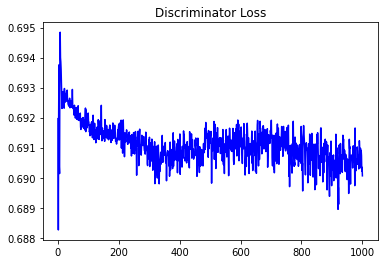

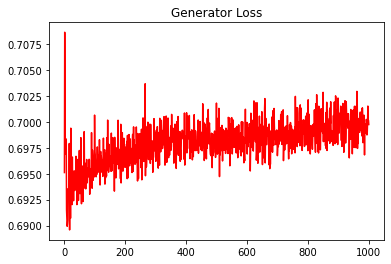

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16339203198627197


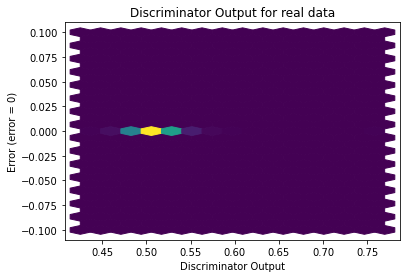

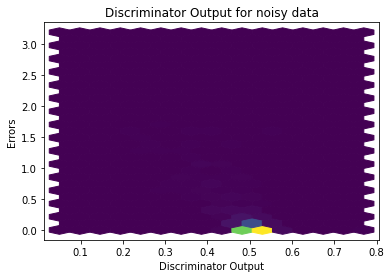

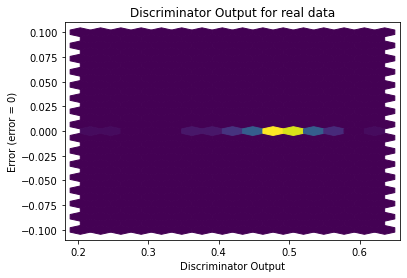

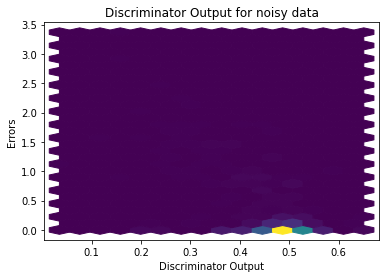

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


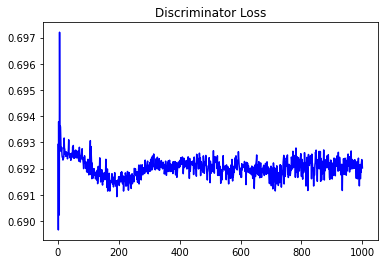

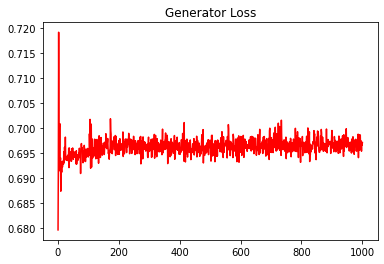

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10458645752769641


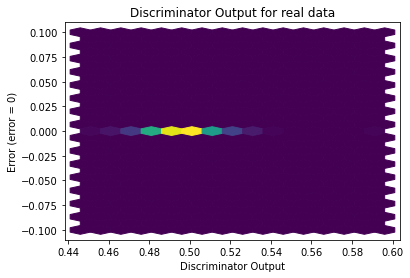

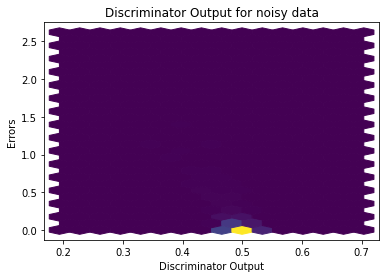

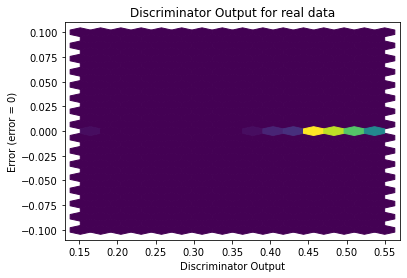

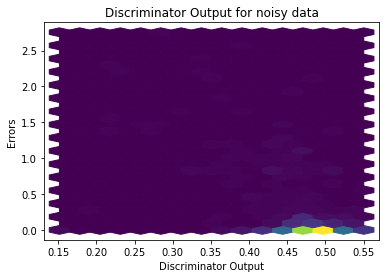

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9942]], requires_grad=True)
